In [1]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.3 MB/s eta 0:00:00


In [2]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)
n_sample=100
X=pd.DataFrame({
    'Size':np.random.rand(n_sample)*100,
    'Bedrooms':np.random.randint(1,5,n_sample),
    'Age':np.random.randint(1,50,n_sample)
    })
y=(X['Size']*300)+(X['Bedrooms']*500)+(X['Age']*200)+np.random.rand(n_sample)*10000
print(X.head())
print(y.head())

        Size  Bedrooms  Age
0  37.454012         3   33
1  95.071431         4    1
2  73.199394         3   19
3  59.865848         1    2
4  15.601864         4   44
0    21124.430658
1    34386.117038
2    34701.523485
3    26069.153768
4    18561.167132
dtype: float64


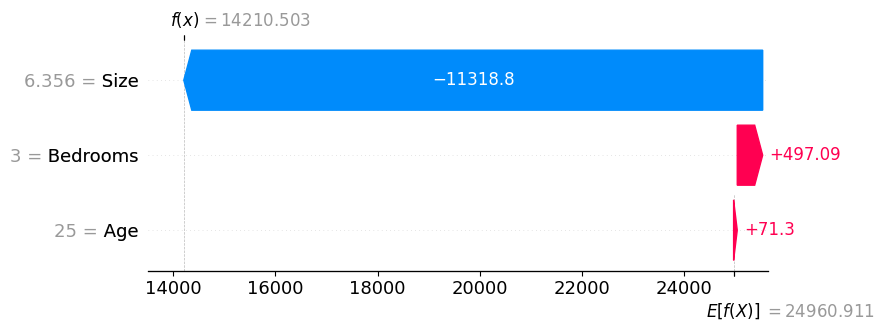

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
explainer=shap.Explainer(model,X_train)
shap_values=explainer(X_test)
shap.plots.waterfall(shap_values[0])

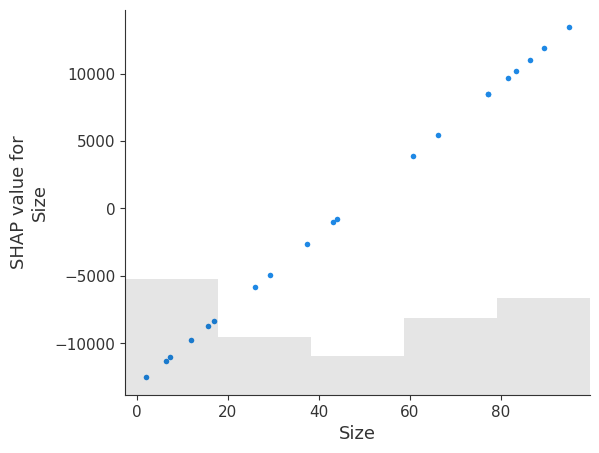

In [4]:
shap.plots.scatter(shap_values[:, 'Size'])

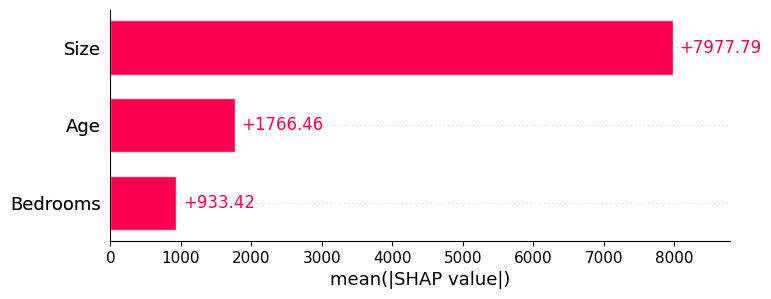

In [5]:
shap.plots.bar(shap_values)

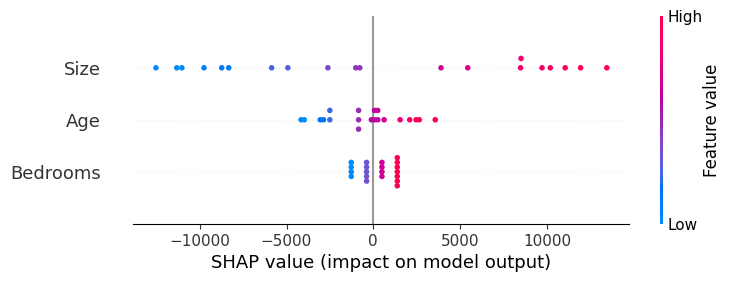

In [6]:
shap.plots.beeswarm(shap_values)

In [7]:
shap.initjs()
shap.plots.force(shap_values[0:100])